# 安装FLGo

在使用FLGo之前，需要自行安装以下基本的库：numpy，pytorch，torchvision，scipy，numpy，matplotlib，prettytable。这些库对版本没有特殊要，网上配置教程较多，这里不再赘述。

在FLGo中还会用到一些额外的第三方库，这些库主要针对特定功能或算法的实现，比如cvxopt，pynvml等，可以等用到的时候再进行安装。由于近期刚刚把原来的github仓库封装成包，暂时挂在了test.pypi上，后续完善基础的一些文档和说明后将挂到pypi上。在命令行输入下列命令即可安装FLGo

In [1]:
!pip install -i https://test.pypi.org/simple/ test-flgo-wwwzz

Looking in indexes: https://test.pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.7/175.7 kB 785.8 kB/s eta 0:00:0000:0100:01


# 运行FLGo 

In [2]:
import flgo
import flgo.benchmark.mnist_classification as mnist
import flgo.algorithm.fedavg as fedavg
import os

### 生成联邦任务 \ Generate Federated Task

生成mnist的IID划分，人数为100人，代码如下：

In [13]:
task = './test_mnist'
config = {'benchmark':{'name':'flgo.benchmark.mnist_classification'},'partitioner':{'name': 'IIDPartitioner','para':{'num_clients':100}}}
if not os.path.exists(task): flgo.gen_task(config, task_path = task)

### 开始使用fedavg联邦训练 \ Start training with FedAvg

使用fedavg训练，参数为5轮，本地训练epoch为1，仅使用0卡训练

In [14]:
fedavg_runner = flgo.init(task=task, algorithm=fedavg, option={'num_rounds':5, 'num_epochs':1, 'gpu':0})
fedavg_runner.run()

2023-03-14 15:02:31,754 fflow.py init [line:347] INFO Initializing devices: cuda:0 will be used for this running.
2023-03-14 15:02:31,826 fflow.py init [line:389] INFO Use `<class 'flgo.simulator.default_simulator.Simulator'>` as the system simulator
2023-03-14 15:02:31,827 fflow.py init [line:397] INFO Ready to start.
2023-03-14 15:02:31,830 fedbase.py run [line:104] INFO --------------Initial Evaluation--------------
2023-03-14 15:02:31,830 simple_logger.py log_once [line:13] INFO Current_time:0
2023-03-14 15:02:34,907 simple_logger.py log_once [line:27] INFO test_accuracy                 0.0845
2023-03-14 15:02:34,908 simple_logger.py log_once [line:27] INFO test_loss                     2.3038
2023-03-14 15:02:34,909 simple_logger.py log_once [line:27] INFO val_accuracy                0.0772
2023-03-14 15:02:34,909 simple_logger.py log_once [line:27] INFO mean_val_accuracy           0.0772
2023-03-14 15:02:34,909 simple_logger.py log_once [line:27] INFO std_val_accuracy            

###  训练结果展示 \ Training Result

绘制训练过程中的验证集损失和验证集精度

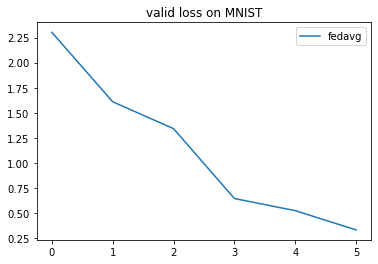

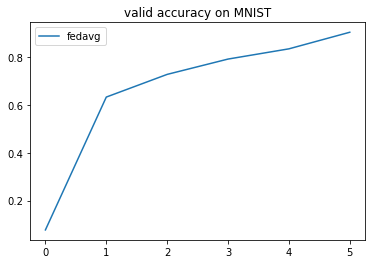

In [15]:
import flgo.experiment.analyzer as al
analysis_plan = {
    'Selector':{
        'task': task,
        'header':['fedavg']
    },
    'Painter':{
        'Curve':[
            {'args':{'x': 'communication_round', 'y':'val_loss'}, 'fig_option':{'title':'valid loss on MNIST'}},
            {'args':{'x': 'communication_round', 'y':'val_accuracy'},  'fig_option':{'title':'valid accuracy on MNIST'}},
        ]
    }
}
al.show(analysis_plan)